In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [12]:
train_set = pd.read_csv(r"c:\Users\Siddharth Sharma\OneDrive\Desktop\UnRar\titanic\train.csv")
print(train_set)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [13]:
test_set = pd.read_csv(r"c:\Users\Siddharth Sharma\OneDrive\Desktop\UnRar\titanic\test.csv")
print(test_set)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Pclass'>

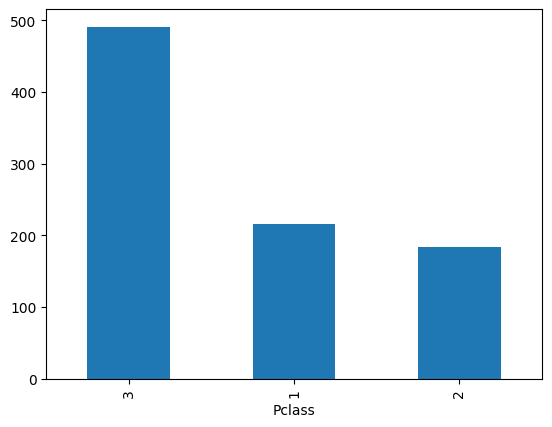

In [14]:
frequency_of_class = train_set['Pclass'].value_counts()
print(frequency_of_class)
frequency_of_class.plot(kind= 'bar')


Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived'>

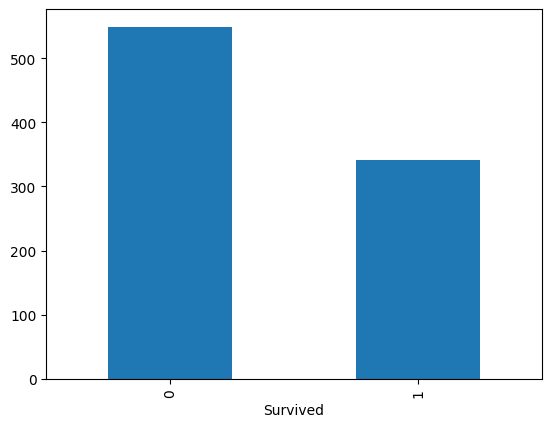

In [15]:
no_of_survived = train_set['Survived'].value_counts()
print(no_of_survived)
no_of_survived.plot(kind = 'bar')

Sex
male      577
female    314
Name: count, dtype: int64


<Axes: xlabel='Sex'>

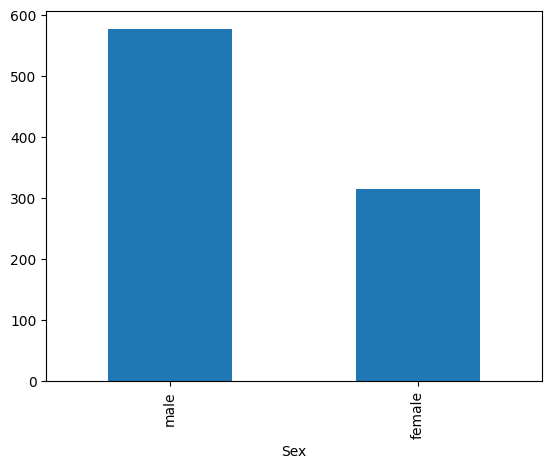

In [16]:
sex_division= train_set['Sex'].value_counts()
print(sex_division)
sex_division.plot(kind = 'bar')

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


<Axes: xlabel='Sex,Survived'>

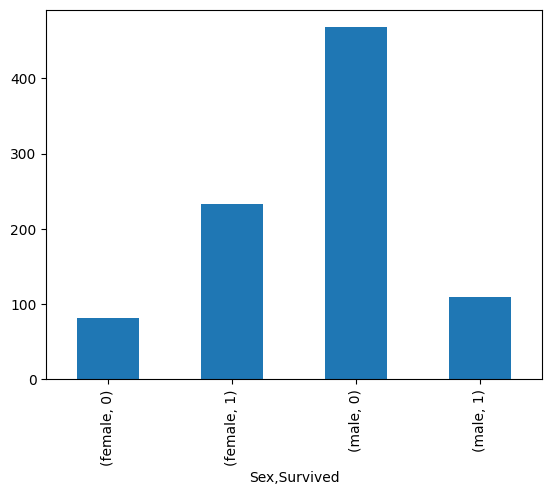

In [17]:
survival_by_gender = train_set.groupby(['Sex', 'Survived']).size()
print(survival_by_gender)
survival_by_gender.plot(kind = 'bar')

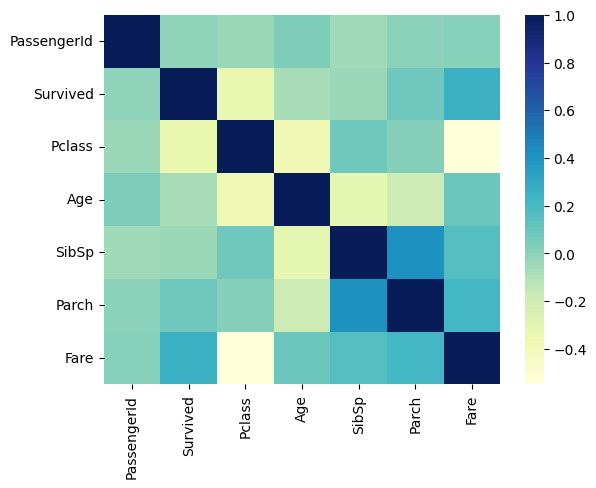

In [19]:
import seaborn as sns
numeric_data = train_set.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.show()

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
train_set_split = StratifiedShuffleSplit( n_splits= 1 , test_size= 0.2)
for train_indices , test_indices in train_set_split.split(train_set , train_set[["Survived"]]):
    strat_test_set = train_set.loc[train_indices]
    strat_train_set = train_set.loc[train_indices]

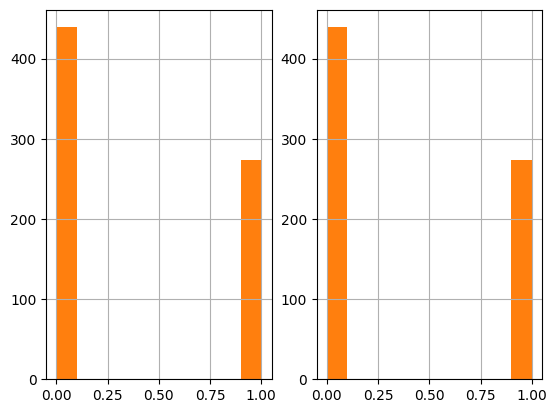

In [33]:
plt.subplot(1 , 2  , 1)
strat_train_set["Survived"].hist()
strat_train_set["Survived"].hist()



plt.subplot(1 , 2  , 2)
strat_test_set["Survived"].hist()
strat_test_set["Survived"].hist()
plt.show()

In [34]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 294 to 847
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          567 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        157 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB
